Most of the core algorithmic stuff is packaged into _SDOptimizer_. We instantiate an object and then load in the data from a single smoke source which was obtained from Katie's simulation. This represents the smoke consentation at a point on the wall at a certain time. 

In [1]:
import numpy as np
from SDOptimizer import SDOptimizer
DATA_FILE = "exportUSLab.csv"  # Points to the data Katie gave us
SDO = SDOptimizer()
SDO.load_data(DATA_FILE)

What we really want to extract from the data is the minimum time to alarm at any location on the wall. _SDOptimizer.get_time_to_alarm()_ takes the most-recently loaded data and returns this information. The data can be optionally flipped about the x or y axis to provide augmented data for testing, since we only have one smoke source. You can also select which one to visualize.

In [2]:
source1 = SDO.get_time_to_alarm(False, False) # the default value of flip is false, so this is simply included for clarity
source2 = SDO.get_time_to_alarm(True, False) # flip about the x axis
source3 = SDO.get_time_to_alarm(False, True) # flip about the x axis

Now, we generate our objective function from this data. This function maps from the locations of all smoke detectors, to the worst-case time to alarm. This is done by finding, for each smoke source, the minimum time to alarm for any detector, and then taking the largest value, representing the worst-case smoke source. 

The behavior of the objective function can be somewhat visualized by fixing the location of _n_ smoke detectors and then sweeping the last one. Each smoke source is also shown.

The bounds are now [(0, 8.1), (0, 3.1), (0, 8.1), (0, 3.1), (0, 8.1), (0, 3.1)]


<Figure size 432x288 with 0 Axes>

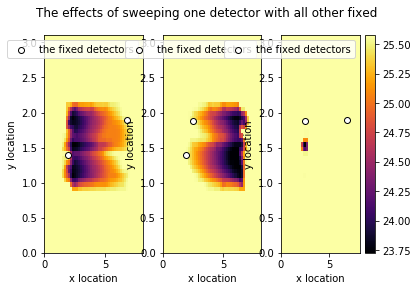

<Figure size 432x288 with 0 Axes>

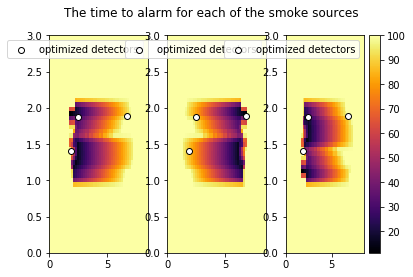

The locations are: (2.468, 1.873), (6.783, 1.890), (1.900, 1.400), 
the result of the optimization is:
            fun: 25.575660612091635
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 69
  status: 1
 success: True
       x: array([2.46823343, 1.87264704, 6.78337342, 1.89009913, 1.89987666,
       1.39984152])


In [3]:
smoke_sources = [source1, source2, source3]
fixed_detector = [1.70799994, 1.89999998]
bounds =  [0, 8.1, 0, 3.1]
initialization = [1.70799994, 1.89999998, 6.83200002, 1.89999998, 1.9, 1.4]

description = SDO.optimize(smoke_sources, bounds, initialization)
print("the result of the optimization is:\n {}".format(description))

To debug, you can also ues example data drawn from a quadratic. 

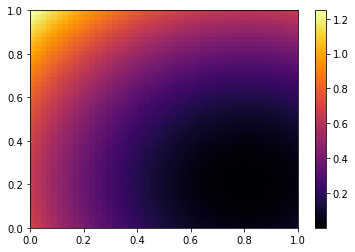

In [4]:
X_BOUNDS = [0, 1]
Y_BOUNDS = [0, 1]
CENTERS = [0.2, 0.8, 0.8, 0.8, 0.8, 0.2]
example1 = SDO.example_time_to_alarm(X_BOUNDS, Y_BOUNDS, CENTERS[:2]) 
example2 = SDO.example_time_to_alarm(X_BOUNDS, Y_BOUNDS, CENTERS[2:4]) 
example3 = SDO.example_time_to_alarm(X_BOUNDS, Y_BOUNDS, CENTERS[4:], show=True) # show

Add some noise to the optimal locations which are the centers

[0.35724238 0.80890662 0.69799163 0.88373039 0.74120428 0.17753628]
The bounds are now [(0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]


<Figure size 432x288 with 0 Axes>

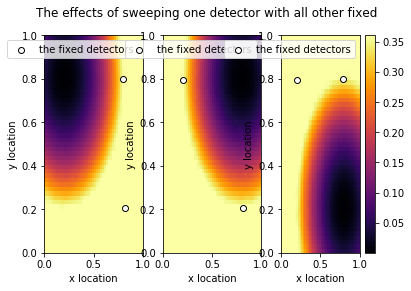

<Figure size 432x288 with 0 Axes>

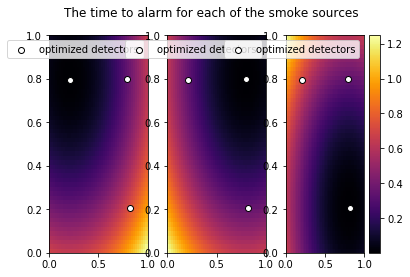

The locations are: (0.210, 0.795), (0.794, 0.801), (0.816, 0.204), 
the result of the optimization is:
            fun: 0.0002877267885819655
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 92
  status: 1
 success: True
       x: array([0.20967933, 0.79499651, 0.79357191, 0.8013081 , 0.81632964,
       0.2039957 ])


In [5]:
example_sources = [example1, example2, example3]
bounds =  [0,1,0,1]
NOISE_SCALE = 0.1
initialization = CENTERS + np.random.normal(scale=NOISE_SCALE, size=(len(CENTERS)))
print(initialization)
description = SDO.optimize(example_sources, bounds, initialization)
print("the result of the optimization is:\n {}".format(description))